
 CUSTOMER PURCHASE PATTERNS
               Total_Spent  Avg_Order_Value  Number_of_Orders  Total_Quantity
Customer_Name                                                                
Riya                 87000          21750.0                 4               5
John                 51600          25800.0                 2               3
Alice                15900           5300.0                 3               5
David                 7000           7000.0                 1               1

 TOP CUSTOMERS BASED ON TOTAL SPENDING
               Total_Spent  Avg_Order_Value  Number_of_Orders  Total_Quantity
Customer_Name                                                                
Riya                 87000          21750.0                 4               5
John                 51600          25800.0                 2               3
Alice                15900           5300.0                 3               5
David                 7000           7000.0                 1            

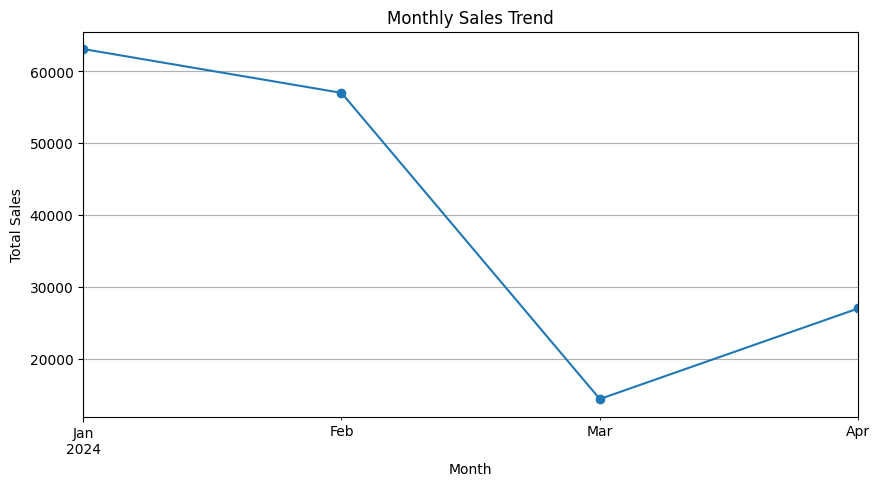

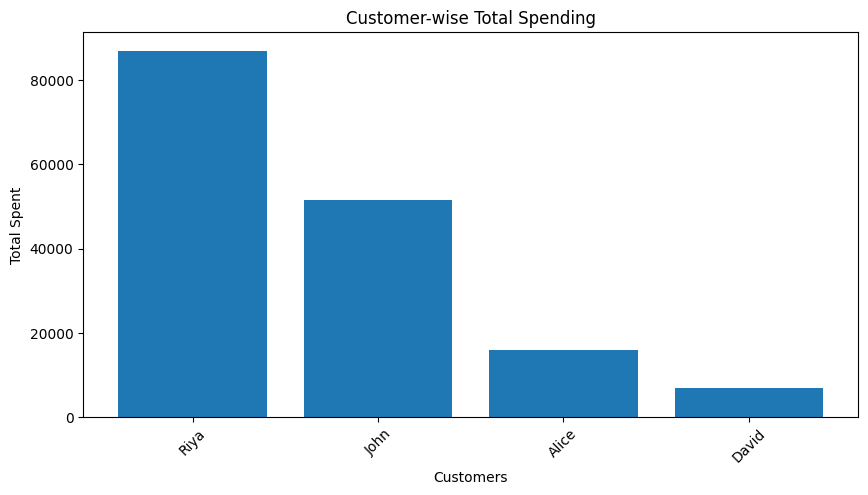


 PRODUCT-WISE SALES SUMMARY
Product
Laptop      100000
Monitor      36000
Table        10000
Chair         7000
Mouse         4000
Headset       3000
Keyboard      1500
Name: Total_Amount, dtype: int64


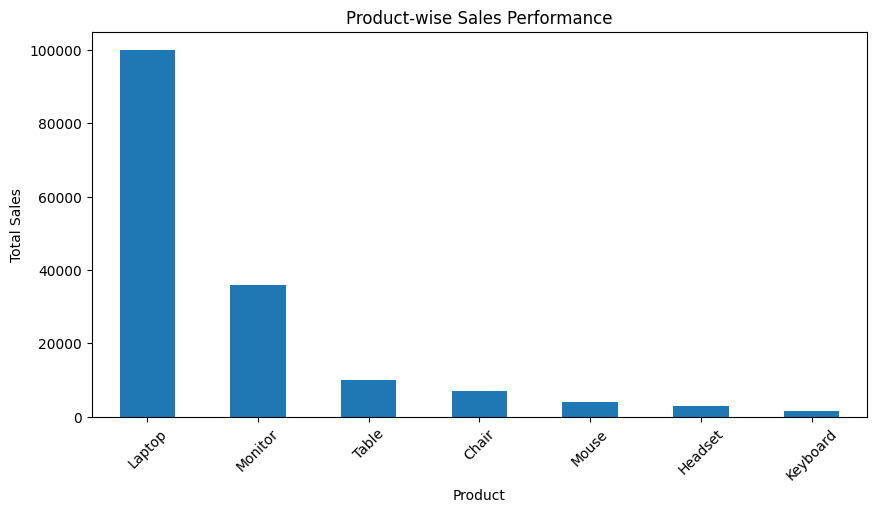


    SALES DASHBOARD  

➡ Total Customers: 4
➡ Total Sales: 161500
➡ Average Order Value: 16150.0

➡  Top Customer: Riya
➡ Highest Monthly Sales: 63100
➡ Best Selling Product: Laptop




In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Customer_ID': [1,1,2,2,2,3,4,4,4,4],
    'Customer_Name': ['John','John','Alice','Alice','Alice','David','Riya','Riya','Riya','Riya'],
    'Date': pd.to_datetime([
        '2024-01-03','2024-01-15','2024-01-10','2024-03-05','2024-03-22',
        '2024-02-01','2024-01-20','2024-02-11','2024-04-12','2024-04-25'
    ]),
    'Product': ['Laptop','Mouse','Keyboard','Monitor','Mouse','Chair',
                'Table','Laptop','Monitor','Headset'],
    'Quantity': [1,2,1,1,3,1,1,1,2,1],
    'Price': [50000,800,1500,12000,800,7000,10000,50000,12000,3000]
})

df['Total_Amount'] = df['Quantity'] * df['Price']

purchase_patterns = df.groupby('Customer_Name').agg({
    'Total_Amount': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
})

purchase_patterns.columns = ['Total_Spent', 'Avg_Order_Value', 'Number_of_Orders', 'Total_Quantity']
purchase_patterns = purchase_patterns.sort_values('Total_Spent', ascending=False)

print("\n CUSTOMER PURCHASE PATTERNS")
print(purchase_patterns)

top_customers = purchase_patterns.sort_values("Total_Spent", ascending=False).head(5)

print("\n TOP CUSTOMERS BASED ON TOTAL SPENDING")
print(top_customers)

df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total_Amount'].sum()

print("\n MONTHLY SALES TREND")
print(monthly_sales)

plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.bar(purchase_patterns.index, purchase_patterns['Total_Spent'])
plt.title("Customer-wise Total Spending")
plt.xlabel("Customers")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.show()

product_sales = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False)

print("\n PRODUCT-WISE SALES SUMMARY")
print(product_sales)

plt.figure(figsize=(10,5))
product_sales.plot(kind='bar')
plt.title("Product-wise Sales Performance")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

print("\n=======================")
print("    SALES DASHBOARD  ")
print("=======================\n")
print("➡ Total Customers:", df['Customer_ID'].nunique())
print("➡ Total Sales:", df['Total_Amount'].sum())
print("➡ Average Order Value:", df['Total_Amount'].mean())
print("\n➡  Top Customer:", top_customers.index[0])
print("➡ Highest Monthly Sales:", monthly_sales.max())
print("➡ Best Selling Product:", product_sales.index[0])
print("\n=======================\n")
